<a href="https://colab.research.google.com/github/srija-guda/FODS-Assignment-1/blob/main/FODS_A1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D

#Task 1

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=14GTYF60OdJzGK8IopRGqpx1ZPncrjCNX'
df = pd.read_csv(url)
print(df.head())
print(df.shape)

          X         Y
0  0.987988  5.098368
1  0.719720  2.516654
2 -0.403403  0.337961
3  0.107107  0.737320
4  0.345345 -0.780955
(1000, 2)


In [ ]:
X = df['X']
Y = df['Y']
X_norm = (X - X.mean()) / X.std()
df_normalized = pd.DataFrame({'X': X_norm, 'Y': Y})

print(df_normalized.head())
df_normalized.describe()

          X         Y
0  1.708680  5.098368
1  1.244722  2.516654
2 -0.697668  0.337961
3  0.185237  0.737320
4  0.597259 -0.780955


,X,Y
count,1.000000e+03,1000.000000
mean,-1.421085e-17,0.954743
std,1.000000e+00,1.809135
min,-1.729454e+00,-5.091491
25%,-8.647271e-01,-0.106178
50%,9.389191e-17,0.912120
75%,8.647271e-01,1.967479
max,1.729454e+00,6.559203


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_norm, Y, test_size=0.2, random_state=42, shuffle=True)
X_train1, X_cv1, y_train1, y_cv1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42, shuffle=True)
print(X_train1.shape)
print(X_test1.shape)
print(X_cv1.shape)

(640,)
(200,)
(160,)


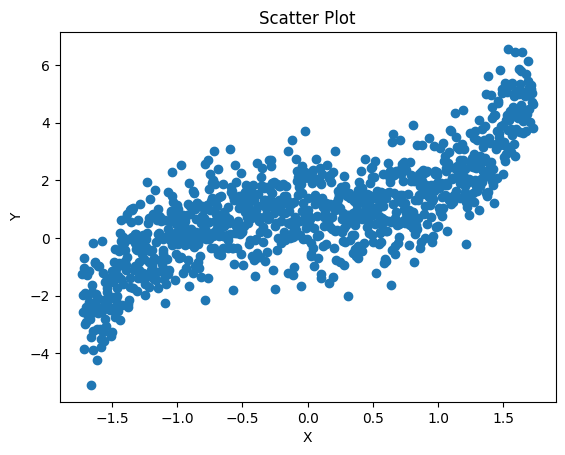

In [ ]:
plt.scatter(X_norm, Y)

plt.title("Scatter Plot")

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

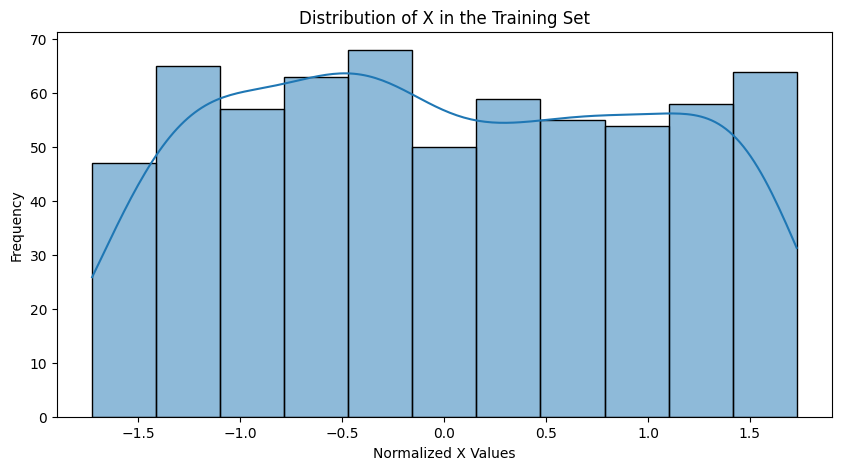

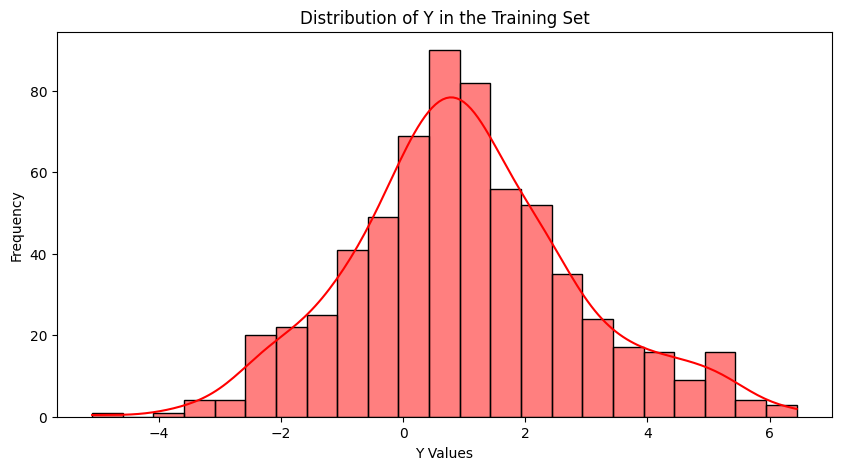

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(X_train1, kde=True)
plt.title('Distribution of X in the Training Set')
plt.xlabel('Normalized X Values')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))

sns.histplot(y_train1, kde=True, color='r')
plt.title('Distribution of Y in the Training Set')
plt.xlabel('Y Values')
plt.ylabel('Frequency')
plt.show()

#Task 2

In [ ]:
class PolyRegression:

    def __init__(self, alpha, num_iters, m, n):

        self.alpha = alpha
        self.num_iters = num_iters
        self.w = np.random.rand(m, 1)
        self.dw = np.zeros((1, m))
        self.m = n

    def compute_error(self, X, y):

        error = (np.matmul(X, self.w)) - np.expand_dims(y, axis = 1)
        error = error**2
        error = error/self.m
        error = np.sum(error)
        return error

    def compute_gradient(self, X, y):
        self.dw = np.matmul(X.T,2*((np.matmul(X, self.w)) - np.expand_dims(y, axis = 1)))
        self.dw /= self.m


    def fit(self, X, y):
        y = np.array(y)

        for i in range(self.num_iters):
            self.compute_gradient(X, y)
            self.w = self.w - self.alpha * self.dw


In [ ]:
n = X_train1.shape[0]
def convertDatatoMatrix(m,n):
  arr = np.zeros((m+1,n))
  for i in range(m+1):
    def func(x):
      return x**i
    arr[i] = func(X_train1)
  return arr.T

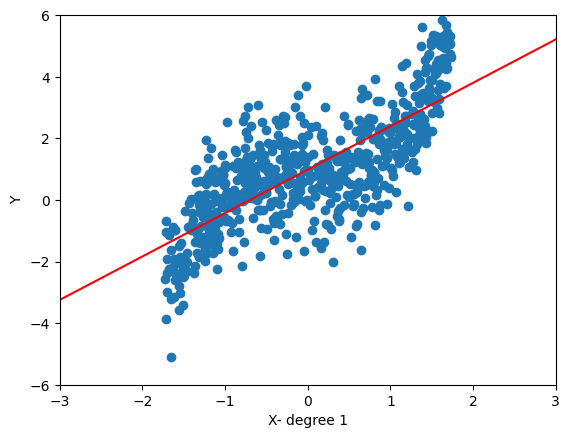

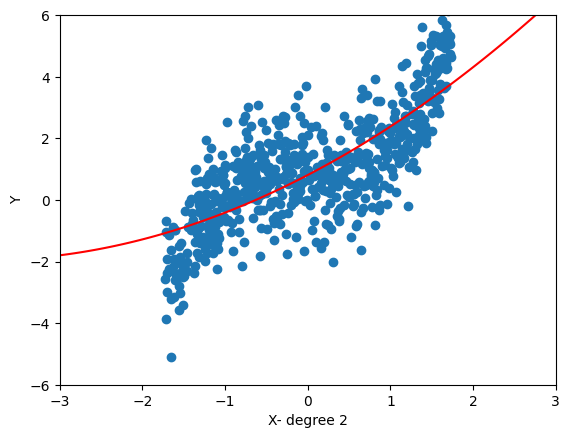

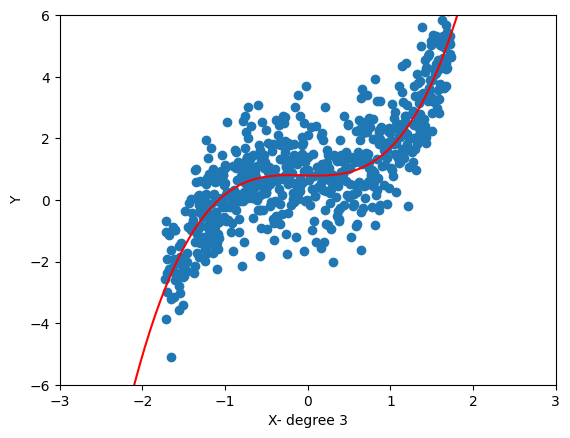

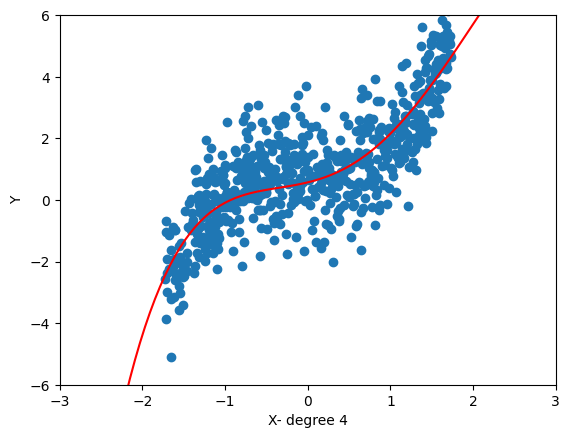

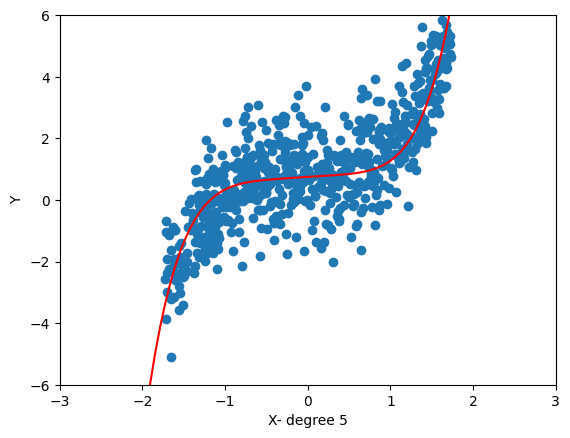

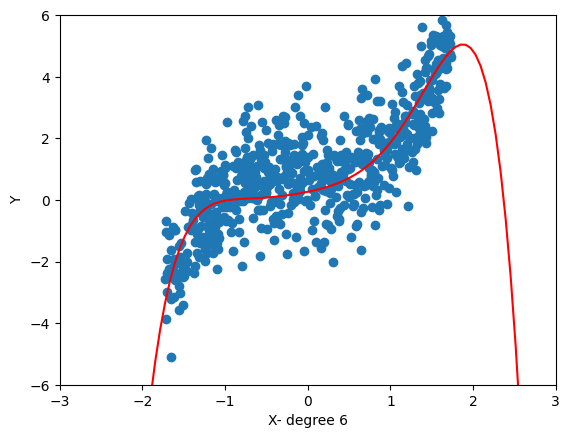

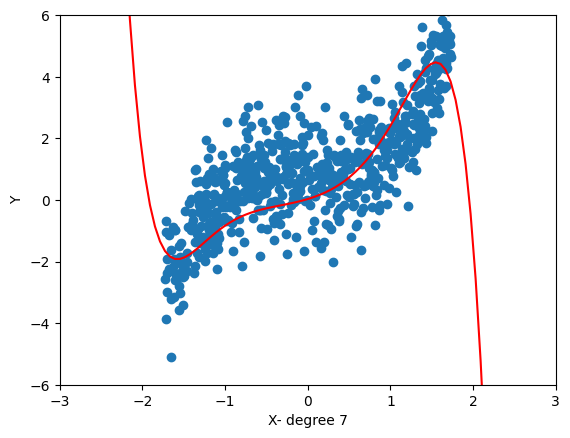

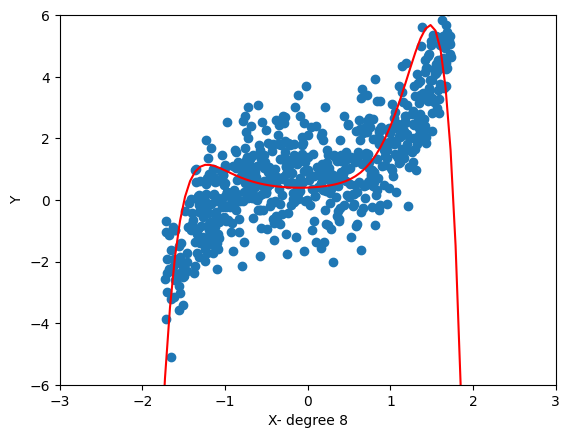

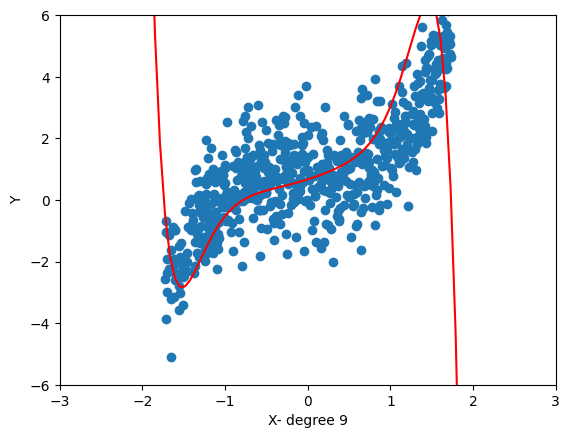

In [ ]:
degrees = [1,2,3,4,5,6,7,8,9]
for m in degrees:
  arr = convertDatatoMatrix(m,n)
  iterations = 500
  if m < 4:
    alpha = 0.1
  elif 4 <= m < 7:
    alpha = 0.001
  else:
    alpha = 0.0001
  PR = PolyRegression(alpha, iterations, arr.shape[1], arr.shape[0])
  PR.fit(arr, y_train1)

  plothelper = np.linspace(-3, 3, 100)
  plothelpee = np.polyval(PR.w[::-1], plothelper)
  plt.scatter(X_train1, y_train1)

  plt.xlabel(f'X- degree {m}')
  plt.ylabel('Y')
  plt.xlim(-3, 3)
  plt.ylim(-6, 6)
  plt.plot(plothelper, plothelpee, 'r')
  plt.show()

#Ridge Regression

In [ ]:
class RidgeRegression:

    def __init__(self, alpha, num_iters, m, n, lam, clip):
        self.alpha = alpha
        self.num_iters = num_iters
        self.w = np.random.rand(m, 1)
        self.dw = np.zeros((m, 1))
        self.m = m #Number of features
        self.n = n #Number of data points
        self.lam = lam #lanbda value
        self.clip = clip

    def compute_error(self, X, y):
        error = (np.matmul(X, self.w)) - np.expand_dims(y, axis = 1)
        error = np.dot(error.T, error)
        error = error/X.shape[0]
        return error

    def compute_gradient(self, X, y):
        self.dw = np.matmul(X.T, 2 * ((np.matmul(X, self.w)) - np.expand_dims(y, axis=1)))
        self.dw /= self.n
        l2_norm = np.linalg.norm(self.dw)
        if (l2_norm > self.clip):
          self.dw = self.clip * (self.dw / l2_norm) #for very large w values

    def fit(self, X, y):
        self.bias = []
        y = np.array(y)

        for i in range(self.num_iters):
            self.compute_gradient(X, y)
            self.w = self.w - self.alpha * (self.dw + (2 * self.lam / self.n) * self.w)

In [ ]:
def convertTestToMatrix(m, n, X_test1):
    arrTest = np.zeros((n, m + 1))
    for i in range(m + 1):
        def func(x):
            return x**i
        arrTest[:, i] = func(X_test1)
    return arrTest

Plot 2: Bias, variance, and total error vs. λ.to arrive the optimal λ. (Bias-Variance Tradeoff
curve).

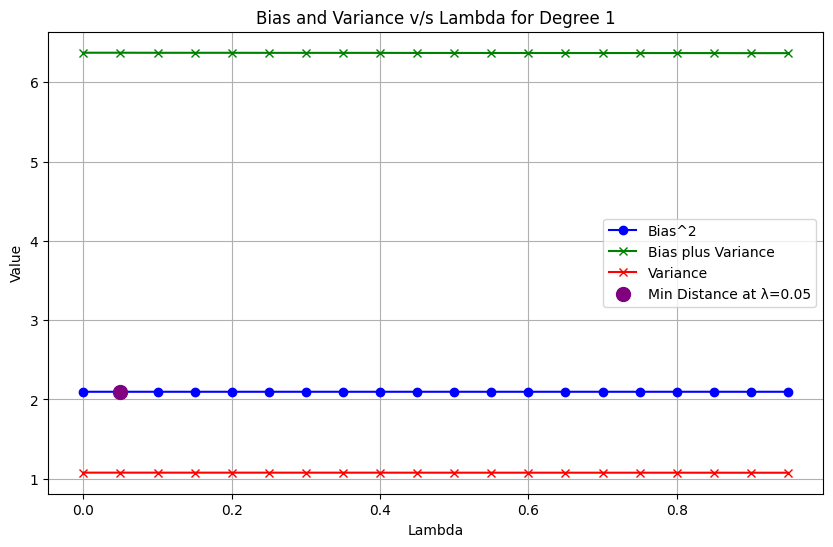

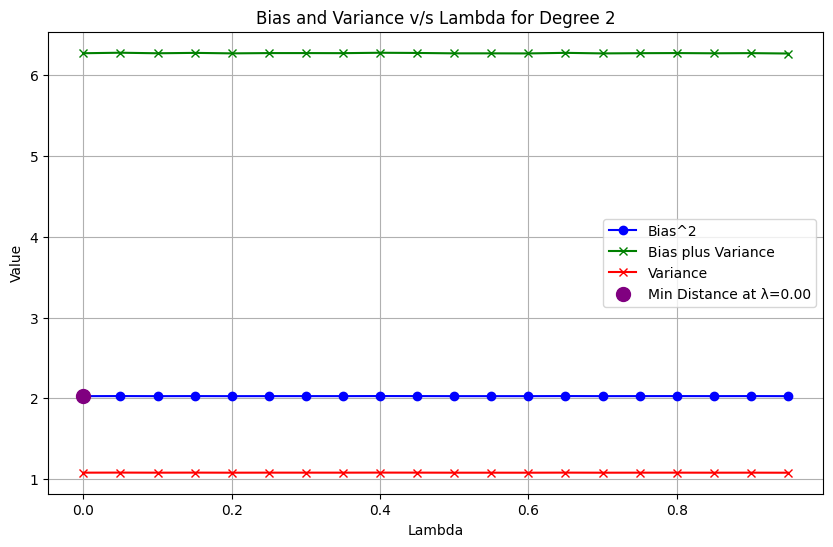

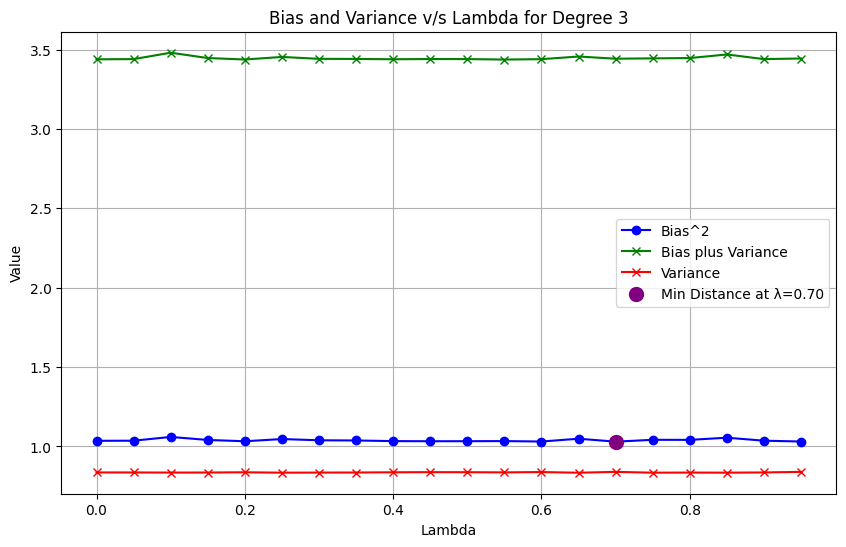

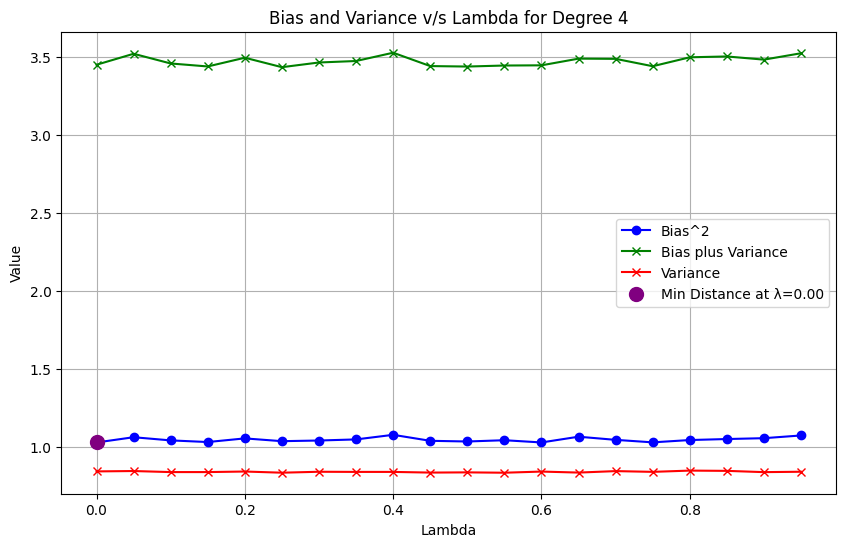

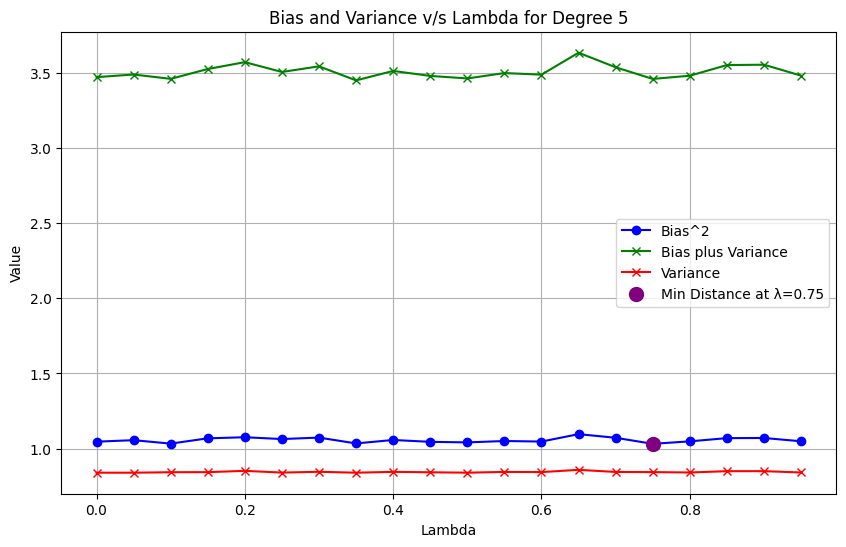

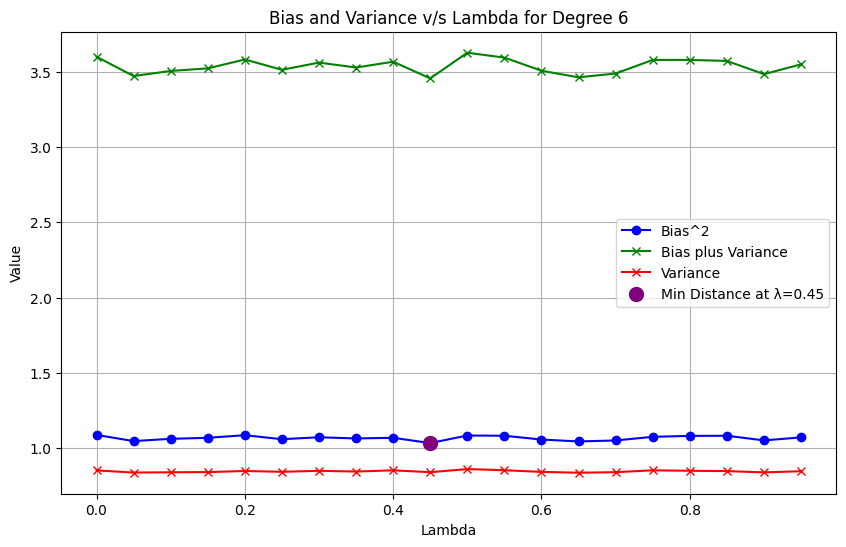

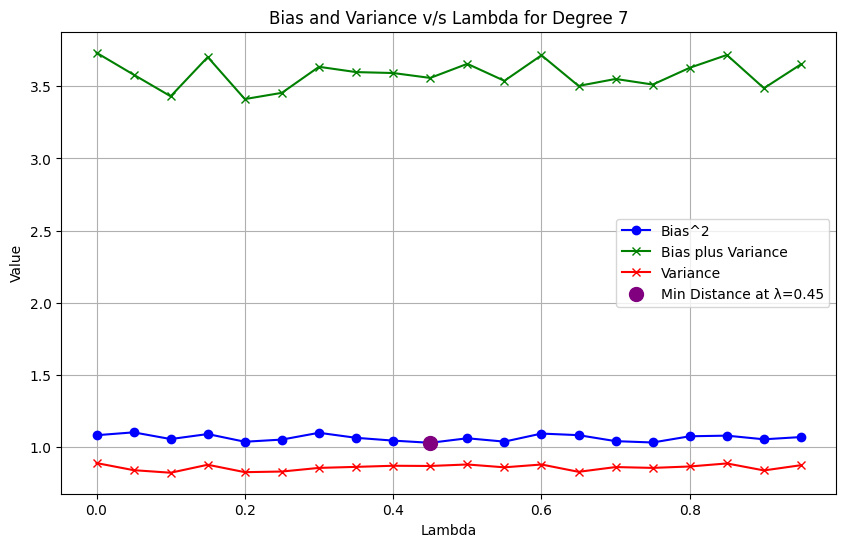

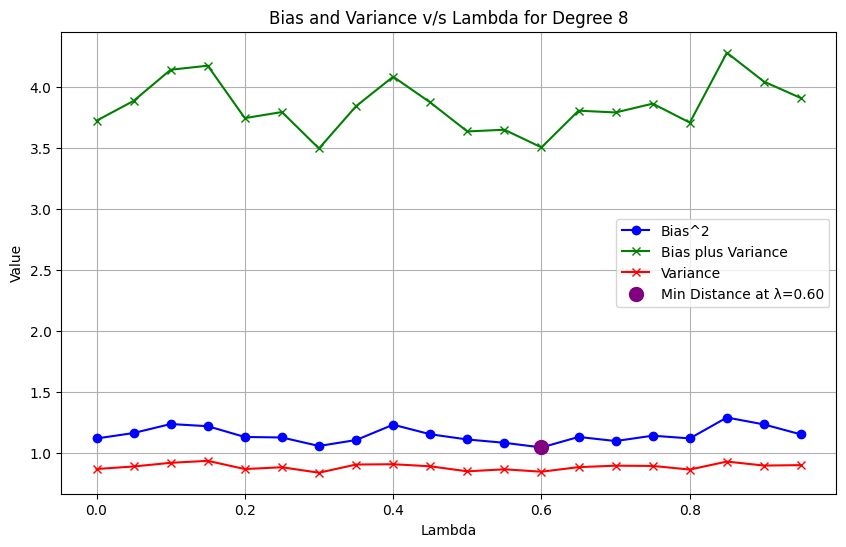

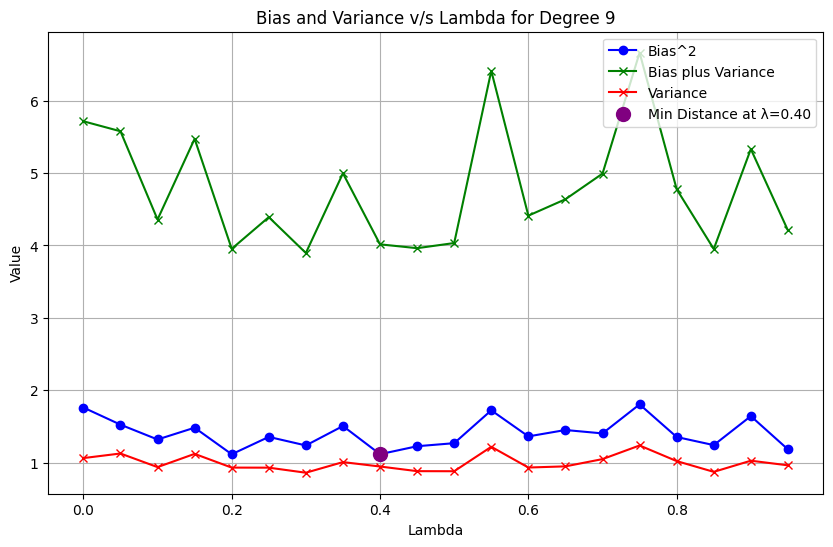

In [ ]:
m_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for m in m_vals:
    n = X_train1.shape[0]
    arr = convertDatatoMatrix(m, n)
    n = X_cv1.shape[0]
    arrTest = convertTestToMatrix(m, n, X_cv1)

    lams=np.arange(0,1,0.05)
    biases = []
    testing_errors = []
    variance = []
    biasPlusVariance = []

    for lam in lams:
        RR = RidgeRegression(0.01, 500, arr.shape[1], arr.shape[0], lam, 0.8)
        RR.fit(arr, y_train1)
        biases.append(RR.compute_error(arr, y_train1)[-1][0])
        variance.append(RR.compute_error(arrTest, y_cv1)[-1][0])

    for i in range(len(biases)):
        biasPlusVariance.append(biases[i] + variance[i])

    biasPlusVariance = [b**2 for b in biasPlusVariance]
    final_biases_squared = [b**2 for b in biases]

    differences = [abs(final_biases_squared[i] - variance[i]) for i in range(len(lams))]

    min_diff_index = differences.index(min(differences))

    min_diff_lambda = lams[min_diff_index]

    min_diff_bias_squared = final_biases_squared[min_diff_index]
    min_diff_variance = variance[min_diff_index]

    plt.figure(figsize=(10, 6))

    plt.plot(lams, final_biases_squared, marker='o', label="Bias^2", color='blue')
    plt.plot(lams, biasPlusVariance, marker='x', label="Bias plus Variance", color='green')
    plt.plot(lams, variance, marker='x', label="Variance", color='red')

    plt.scatter(min_diff_lambda, min_diff_bias_squared, color='purple', s=100, zorder=5, label=f'Min Distance at λ={min_diff_lambda:.2f}')

    plt.xlabel('Lambda')
    plt.ylabel('Value')
    plt.title(f'Bias and Variance v/s Lambda for Degree {m}')

    plt.grid(True)
    plt.legend()
    plt.show()


Plot 1: Train and test error vs. polynomial degree (1 to 9)

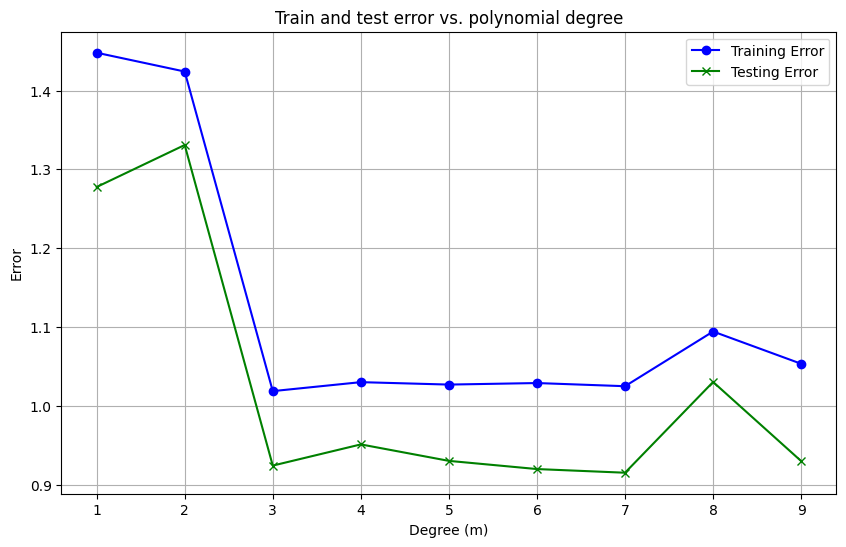

In [ ]:
m_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9]
testing_errors=[]
training_error = []
for m in m_vals:
  n = X_train1.shape[0]
  arr = convertDatatoMatrix(m,n)
  n = X_test1.shape[0]
  arrTest = convertTestToMatrix(m, n, X_test1)

  RR = RidgeRegression(0.01, 500, arr.shape[1], arr.shape[0], 0.6, 0.8)
  RR.fit(arr, y_train1)
  training_error.append(RR.compute_error(arr, y_train1)[-1][0])
  testing_errors.append(RR.compute_error(arrTest, y_test1)[-1][0])

plt.figure(figsize=(10, 6))

plt.plot(m_vals, training_error, marker='o', label="Training Error", color='blue')
plt.plot(m_vals, testing_errors, marker='x', label="Testing Error", color='green')

plt.xlabel('Degree (m)')
plt.ylabel('Error')
plt.title('Train and test error vs. polynomial degree')


plt.grid(True)
plt.legend()
plt.show()

Plot 3: Plot the best polynomial fit on the data points

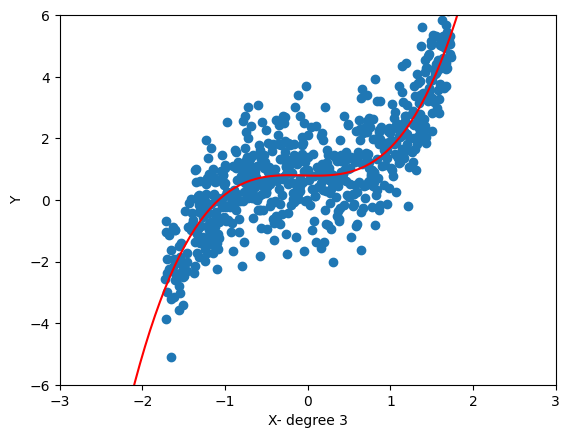

In [ ]:
m = 3
n = X_train1.shape[0]
arr = convertDatatoMatrix(m,n)
iterations = 500
alpha = 0.1
RR = RidgeRegression(alpha, iterations, arr.shape[1], arr.shape[0], 0.35, float("inf"))
RR.fit(arr, y_train1)

plothelper = np.linspace(-3, 3, 100)
plothelpee = np.polyval(RR.w[::-1], plothelper)
plt.scatter(X_train1, y_train1)

plt.xlabel(f'X- degree 3')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.plot(plothelper, plothelpee, 'r')
plt.show()

Plot 4: A 3D plot where each x and y axis represent the hyperparameters learning rate,
regularization strength and the z axis represents model performance (mean squared error)
and provide an analysis from the plot about how different combinations of
hyperparameters affect the model performance for all the models from degree 1 to 9.

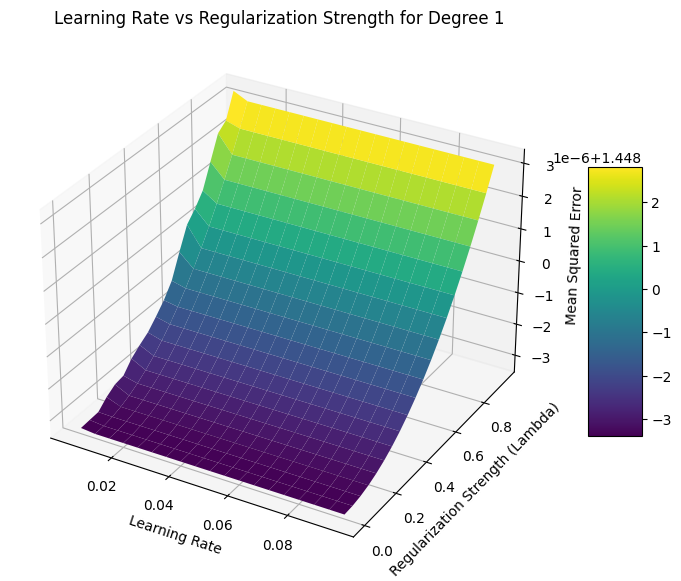

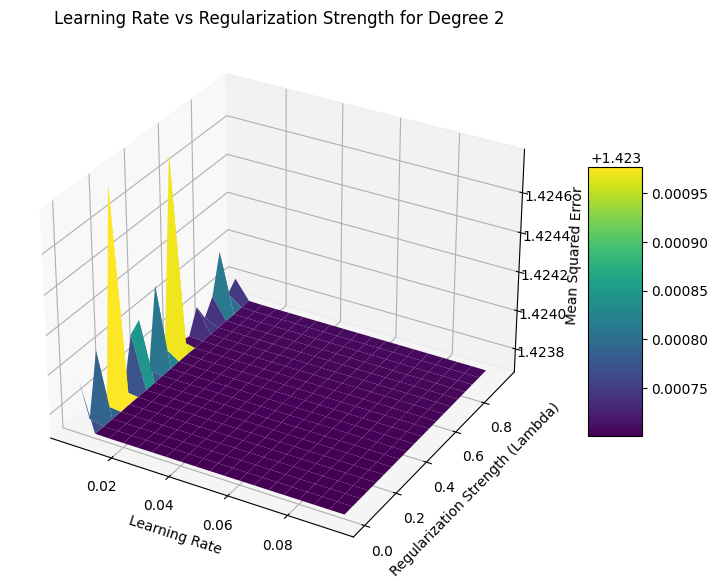

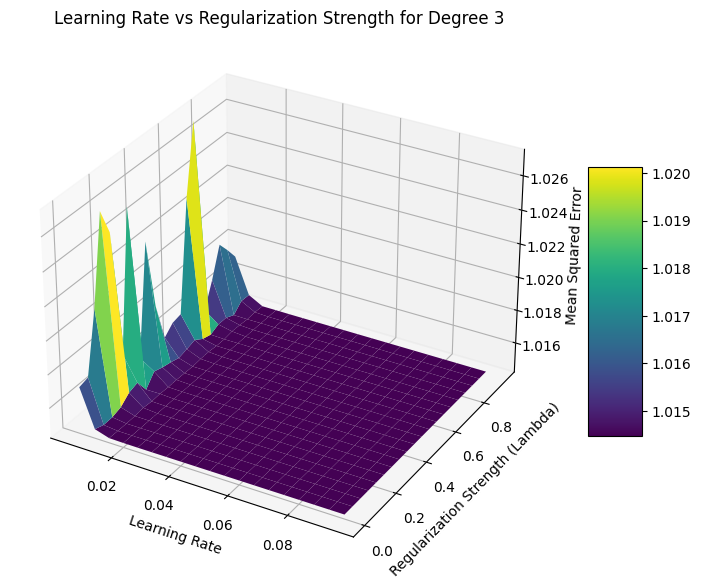

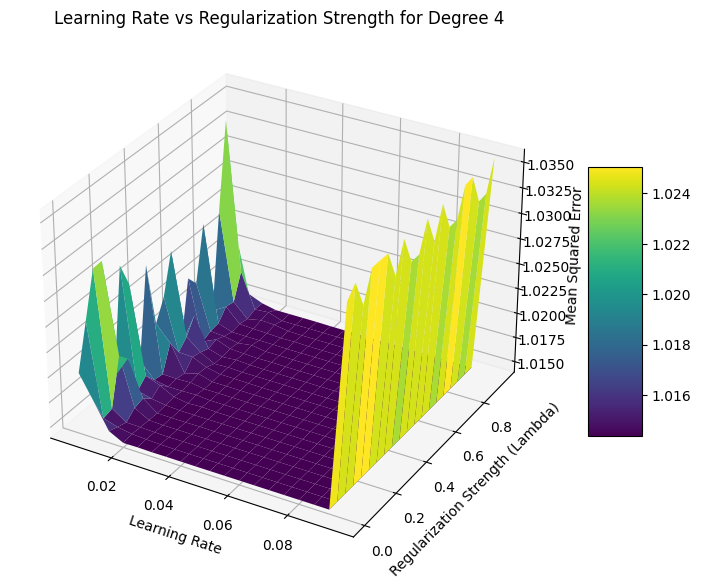

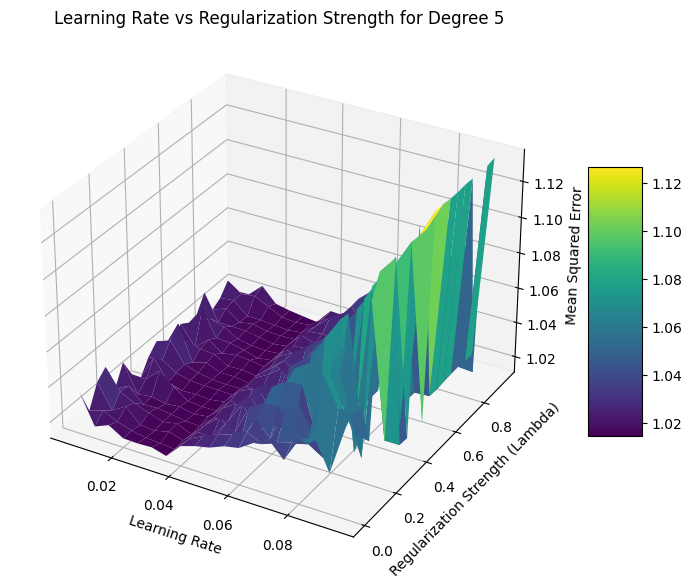

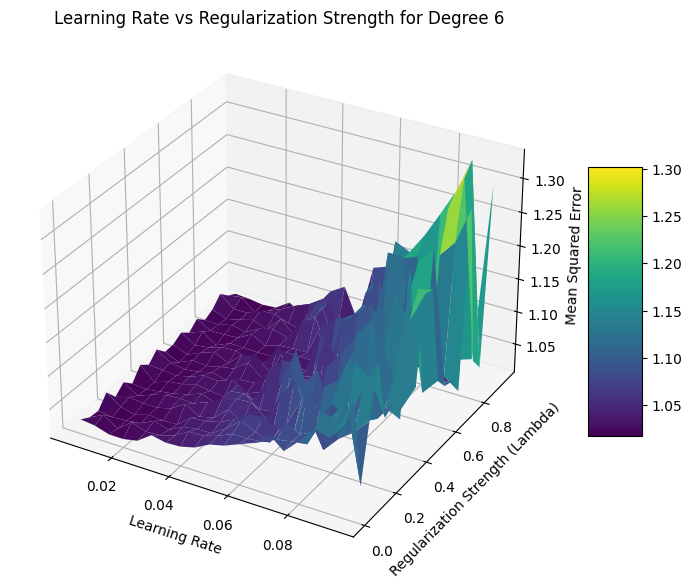

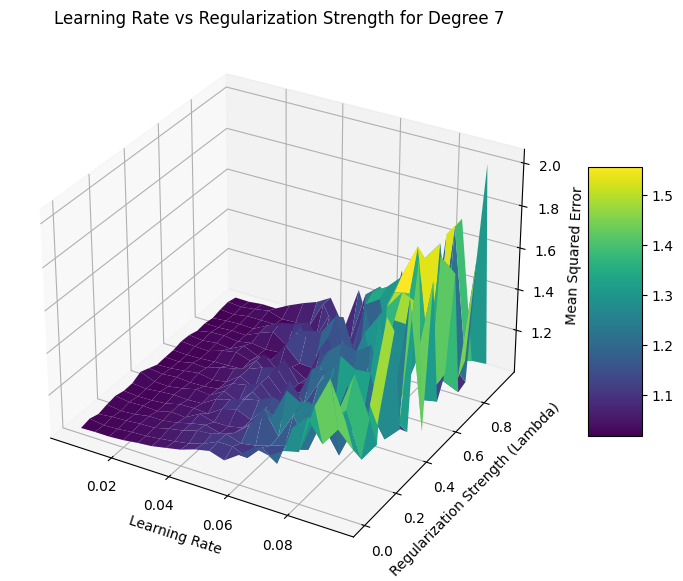

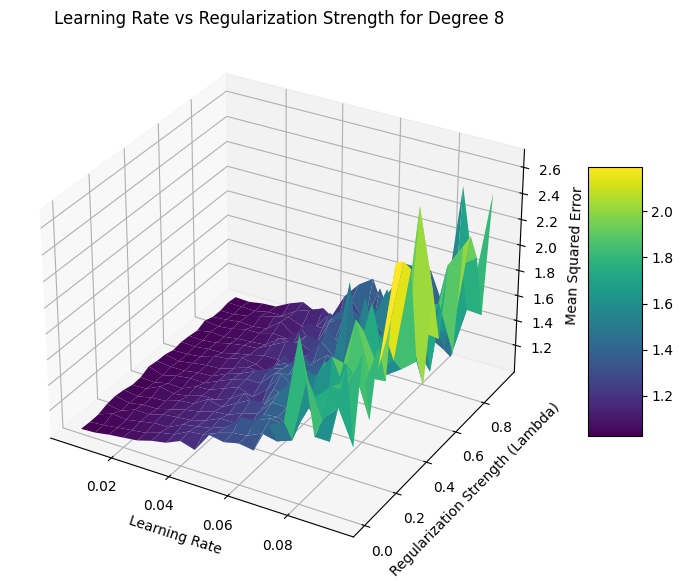

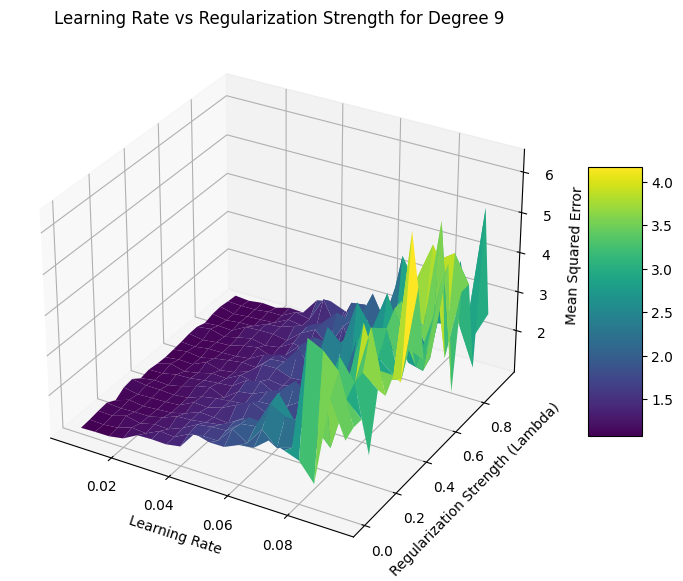

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

for degree in range(1, 10):
    n = X_train1.shape[0]
    arr = convertDatatoMatrix(degree, n)

    rates = np.arange(0.005, 0.1, 0.005)
    lams=np.arange(0,1,0.05)
    error = []

    for lr in rates:
      error_row = []
      for lam in lams:

          RR = RidgeRegression(lr, 1000, arr.shape[1], arr.shape[0], lam, 0.9)
          RR.fit(arr, y_train1)

          error_value = RR.compute_error(arr, y_train1)
          error_row.append(float(error_value[-1][0]))

      error.append(error_row)

    error = np.array(error)

    X, Y = np.meshgrid(rates, lams)

    Z = np.array(error).T

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Regularization Strength (Lambda)')
    ax.set_zlabel('Mean Squared Error')
    ax.set_title(f'Learning Rate vs Regularization Strength for Degree {degree}')

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()


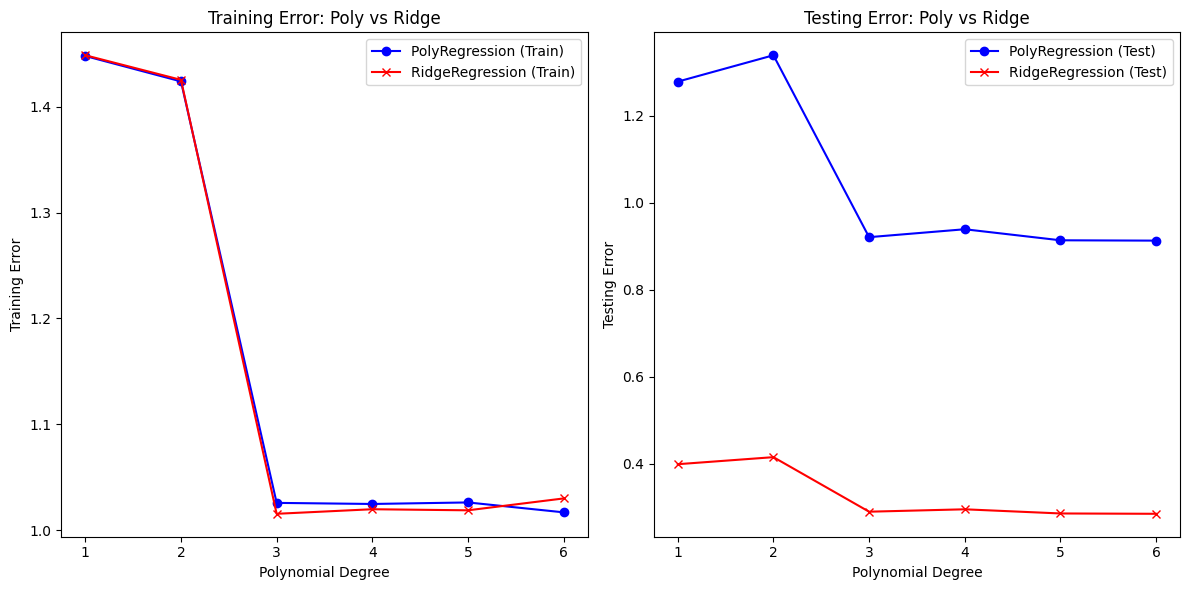

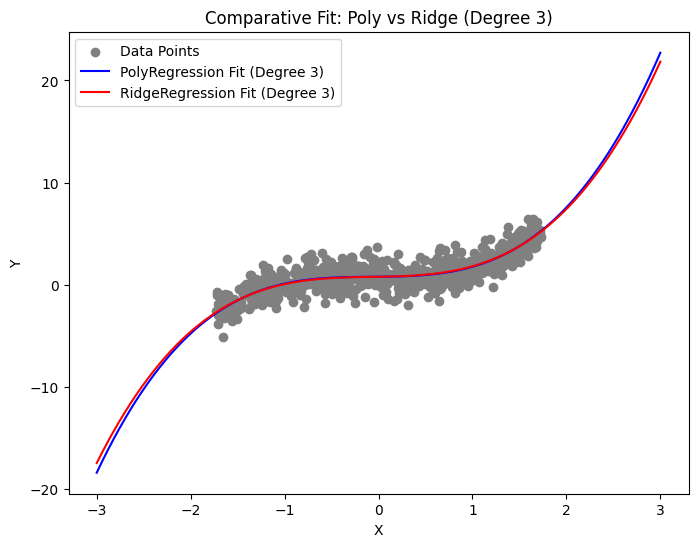

In [ ]:
degrees = [1, 2, 3, 4, 5, 6]
training_errors_poly = []
testing_errors_poly = []
training_errors_ridge = []
testing_errors_ridge = []


for m in degrees:

    arr_train = convertDatatoMatrix(m, X_train1.shape[0])
    arr_test = convertTestToMatrix(m, X_test1.shape[0], X_test1)


    poly_model = PolyRegression(alpha=0.01, num_iters=500, m=arr_train.shape[1], n=arr_train.shape[0])
    poly_model.fit(arr_train, y_train1)
    train_error_poly = poly_model.compute_error(arr_train, y_train1)
    test_error_poly = poly_model.compute_error(arr_test, y_test1)
    training_errors_poly.append(train_error_poly)
    testing_errors_poly.append(test_error_poly)


    ridge_model = RidgeRegression(alpha=0.01, num_iters=500, m=arr_train.shape[1], n=arr_train.shape[0], lam=10, clip=0.8)
    ridge_model.fit(arr_train, y_train1)
    train_error_ridge = ridge_model.compute_error(arr_train, y_train1).flatten()  # Flattening the error
    test_error_ridge = ridge_model.compute_error(arr_test, y_test1).flatten()  # Flattening the error
    training_errors_ridge.append(train_error_ridge[0])  # Append the scalar value
    testing_errors_ridge.append(test_error_ridge[0])  # Append the scalar value


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(degrees, training_errors_poly, label="PolyRegression (Train)", marker='o', color='blue')
plt.plot(degrees, training_errors_ridge, label="RidgeRegression (Train)", marker='x', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Training Error')
plt.title('Training Error: Poly vs Ridge')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, testing_errors_ridge, label="PolyRegression (Test)", marker='o', color='blue')
plt.plot(degrees, testing_errors_poly, label="RidgeRegression (Test)", marker='x', color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('Testing Error')
plt.title('Testing Error: Poly vs Ridge')
plt.legend()

plt.tight_layout()
plt.show()

m = 3
arr_train = convertDatatoMatrix(m, X_train1.shape[0])
plothelper = np.linspace(-3, 3, 100)


poly_model = PolyRegression(alpha=0.01, num_iters=500, m=arr_train.shape[1], n=arr_train.shape[0])
poly_model.fit(arr_train, y_train1)
poly_fit = np.polyval(poly_model.w[::-1], plothelper)


ridge_model = RidgeRegression(alpha=0.01, num_iters=500, m=arr_train.shape[1], n=arr_train.shape[0], lam=0.6, clip=0.8)
ridge_model.fit(arr_train, y_train1)
ridge_fit = np.polyval(ridge_model.w[::-1], plothelper)

plt.figure(figsize=(8, 6))
plt.scatter(X_train1, y_train1, label='Data Points', color='gray')
plt.plot(plothelper, poly_fit, label='PolyRegression Fit (Degree 3)', color='blue')
plt.plot(plothelper, ridge_fit, label='RidgeRegression Fit (Degree 3)', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparative Fit: Poly vs Ridge (Degree 3)')
plt.legend()
plt.show()


In [ ]:
url1 = 'https://drive.google.com/uc?export=download&id=14GTYF60OdJzGK8IopRGqpx1ZPncrjCNX'
df1 = pd.read_csv(url1)

X1 = df1['X']
Y1 = df1['Y']
X1_norm = (X1 - X1.mean()) / X1.std()
df1_normalized = pd.DataFrame({'X': X1_norm, 'Y': Y1})

df1_normalized.describe()

X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1_norm, Y1, test_size=0.2, random_state=42, shuffle=True)


n1 = X1_train1.shape[0]
def convertDatatoMatrix1(m1,n1):
  arr1 = np.zeros((m1+1,n1))
  for i in range(m1+1):
    def func(x):
      return x**i
    arr1[i] = func(X1_train1)
  return arr1.T


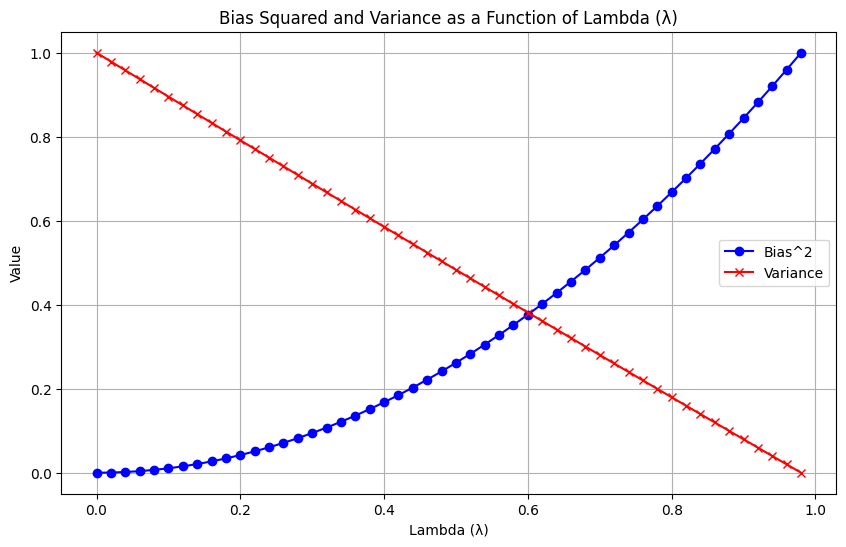

In [ ]:
#Ridge Regression

class RidgeRegression1:

    def __init__(self, alpha1, num_iters1, m1, n1, lam1):
        self.alpha1 = alpha1
        self.num_iters1 = num_iters1
        # Initialize w with the correct shape (m, 1) where m is the number of features
        self.w1 = np.random.rand(m1, 1) * 0.01
        self.dw1 = np.zeros((m1, 1))
        self.m1 = m1
        self.n1 = n1
        self.lam1 = lam1
        # self.bias = []
        # self.testError = []

    def compute_error1(self, X1, y1):
        error1 = (np.matmul(X1, self.w1)) - np.expand_dims(y1, axis = 1)
        error1 = np.dot(error1.T, error1)
        error1 = error1/self.n1
        return error1

    def compute_gradient1(self, X1, y1):
        self.dw1 = np.matmul(X1.T, 2 * ((np.matmul(X1, self.w1)) - np.expand_dims(y1, axis=1)))
        self.dw1 /= self.n1

    def fit1(self, X1, y1):
        self.bias1 = []
        y1 = np.array(y1)

        for i in range(self.num_iters1):
            self.compute_gradient1(X1, y1)
           # w_sq = np.sum(self.w ** 2)
            self.w1 = self.w1 - self.alpha1 * (self.dw1 + (2 * self.lam1 / self.n1) * self.w1)

    def predict1(self, X1):
        predicted1 = np.dot(X1, self.w1)
        return predicted1

def makeMatrix1(m1, n1, X1_test1):  # Pass X_test1 as an argument

    arrTest1 = np.zeros((n1, m1 + 1))
    for i in range(m1 + 1):
        def func(x):
            return x**i
        arrTest1[:, i] = func(X1_test1)
    return arrTest1

m1_vals = [3]

for m1 in m1_vals:
  n1 = X1_train1.shape[0]
  arr1 = convertDatatoMatrix1(m1,n1)
  n1 = X1_test1.shape[0]  # Get the size of X_test1
  arrTest1 = makeMatrix1(m1, n1, X1_test1)  # Pass X_test1 to makeMatrix
  lams1 = np.arange(0,1,0.02)
  biases1 = []
  testing_errors1=[]
  for lam1 in lams1:
    RR1 = RidgeRegression1(0.05, 2500, arr1.shape[1], arr1.shape[0], lam1)
    RR1.fit1(arr1, y1_train1)
    biases1.append(RR1.compute_error1(arr1, y1_train1)[-1])
    predict1 = RR1.predict1(arr1)
    testing_errors1.append(RR1.compute_error1(arrTest1, y1_test1)[-1])
  variance1 = []
  for i in range(len(biases1)):
    variance1.append(biases1[i] - testing_errors1[i])

  final_biases_squared1 = [b**2 for b in biases1]
  bias_min1 = np.min(final_biases_squared1)
  bias_max1 = np.max(final_biases_squared1)


  biases_normalized1 = (final_biases_squared1 - bias_min1) / (bias_max1 - bias_min1)

  variance1_min = np.min(variance1)  # Find minimum value
  variance1_max = np.max(variance1)  # Find maximum value


  variance1_normalized = (variance1 - variance1_min) / (variance1_max - variance1_min)

  plt.figure(figsize=(10, 6))


  plt.plot(lams1, biases_normalized1, marker='o', label="Bias^2", color='blue')


  plt.plot(lams1, variance1_normalized, marker='x', label="Variance", color='red')



  plt.xlabel('Lambda (λ)')
  plt.ylabel('Value')
  plt.title('Bias Squared and Variance as a Function of Lambda (λ)')


  plt.grid(True)
  plt.legend()
  plt.show()
